In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Reading in dataframe
file = Path("../data/nyc_311_limit_2020_filtered.csv")
df = pd.read_csv(file).loc[:, ['complaint type', 'descriptor', 'location type']]
print(df.head())

            complaint type             descriptor location type
0        Highway Condition     Graffiti - Highway       Highway
1         Bridge Condition      Graffiti - Bridge        Bridge
2        Highway Condition     Graffiti - Highway       Highway
3        Highway Condition      Pothole - Highway       Highway
4  Overgrown Tree/Branches  Dead Branches in Tree        Street


In [22]:
# Extracting rodent/mice/mouse complaints
df_rat = df[df['complaint type'].str.contains('Rodent|Mice|Mouse', case=False) | df['descriptor'].str.contains('Rodent|Mice|Mouse', case=False)]
location = df_rat.groupby(['location type', 'descriptor']).size().sort_values(ascending=False).reset_index(name='count')
print(location.head())

             location type                    descriptor  count
0  3+ Family Apt. Building                  Rat Sighting   1246
1      1-2 Family Dwelling                  Rat Sighting    466
2  3+ Family Apt. Building  Condition Attracting Rodents    373
3  3+ Family Apt. Building                Mouse Sighting    311
4      1-2 Family Dwelling  Condition Attracting Rodents    222


/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldc

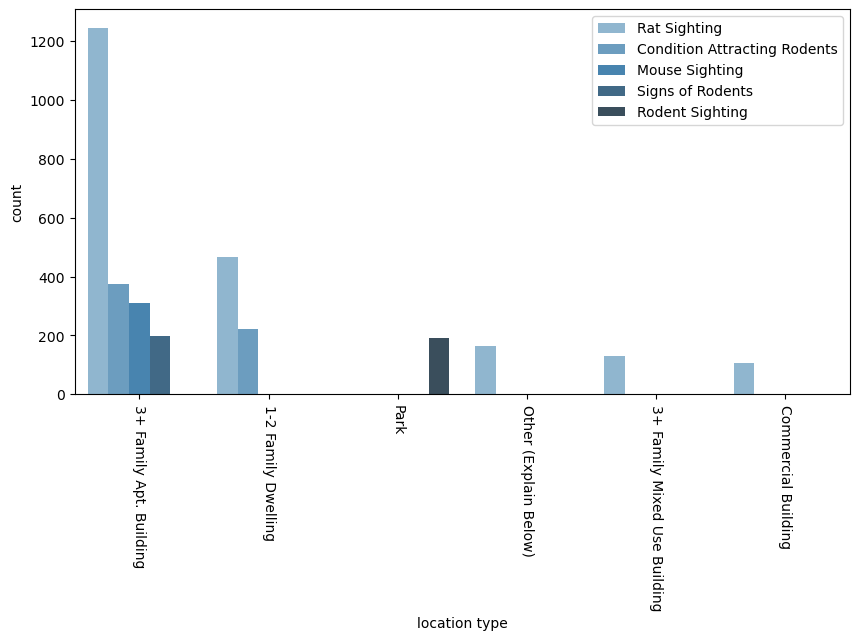

In [27]:
# Filter by location type
plt.figure(figsize=(10, 5))

plots = sns.barplot(x='location type', y='count', data=location.iloc[0:10, :], palette='Blues_d', hue='descriptor')
plots.xaxis.set_tick_params(rotation=-90)
plots.legend(loc='upper right')

plt.savefig('../images/task2_plot.png', bbox_inches='tight')